In [29]:
from typing_extensions import TypedDict
from typing import Annotated
import operator

# Define the state schema
class GraphState(TypedDict):
    message: Annotated[str, operator.add]


In [30]:
# node1 takes an input string and concatenates with another string and returns
# node1 takes an input state and returns updated state
def node1(state: GraphState) -> GraphState:
    return {"message": state["message"] + " I reached Node1."}


In [31]:
# node2 takes an input string and concatenates with another string and returns
# node2 takes an input state and returns updated state  
def node2(state: GraphState) -> GraphState:
    return {"message": state["message"] + " And now at Node2."}


In [32]:
# Install langgraph
# %pip install langgraph

from langgraph.graph import StateGraph

# Create a new Graph with state schema
workflow = StateGraph(GraphState)

# Add the nodes
workflow.add_node("node_1", node1)
workflow.add_node("node_2", node2)

# Add the edges
workflow.add_edge("node_1", "node_2")
workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

# Compile the workflow
app = workflow.compile()

# Test the workflow
initial_state = {"message": "Starting workflow."}
result = app.invoke(initial_state)
print(result["message"])

Starting workflow.Starting workflow. I reached Node1.Starting workflow.Starting workflow. I reached Node1. And now at Node2.


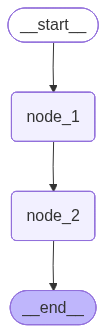

In [33]:
# Visualize your graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
app.invoke({"message": "hello"})

{'message': 'hellohello I reached Node1.hellohello I reached Node1. And now at Node2.'}